# KÜTÜPHANELERİM

In [3]:
import numpy as np#çok boyutlu dizilerle ve matrislerle çalışmamızı sağlayan ve matematiksel işlemler kütüphanesi 
import pandas as pd#veri yükleme, veri ön işleme ve veri temizleme görevleri yapılır
from matplotlib import pyplot as plt#verileri görselleştirmemizi sağlayan iki byutlu grafikler oluşturur
import seaborn as sns#istatiksel bir Python veri görselleştirme kütüphanesidir

# VERİ ÇEKİM YÖNTEMİ 

In [4]:
data = pd.read_csv("https://raw.githubusercontent.com/bajcmartinez/bitcoin-predict/master/data/bitcoin.csv ")
data=data.sort_values('Date')
print(data.head())
y=data[['Close']]
x=data[['Open','High','Low','Volume BTC','Volume USD']]

            Date  Symbol   Open   High     Low  Close  Volume BTC  Volume USD
2000  2014-12-01  BTCUSD  300.0  370.0  300.00  370.0     0.05656       19.53
1999  2014-12-02  BTCUSD  370.0  378.0  370.00  378.0    15.01000     5675.07
1998  2014-12-03  BTCUSD  378.0  378.0  377.01  378.0     0.54660      206.52
1997  2014-12-04  BTCUSD  378.0  378.0  377.10  377.1     0.01000        3.77
1996  2014-12-05  BTCUSD  377.1  377.1  377.10  377.1     0.00000        0.00


# VERİMİN GRAFİĞİ

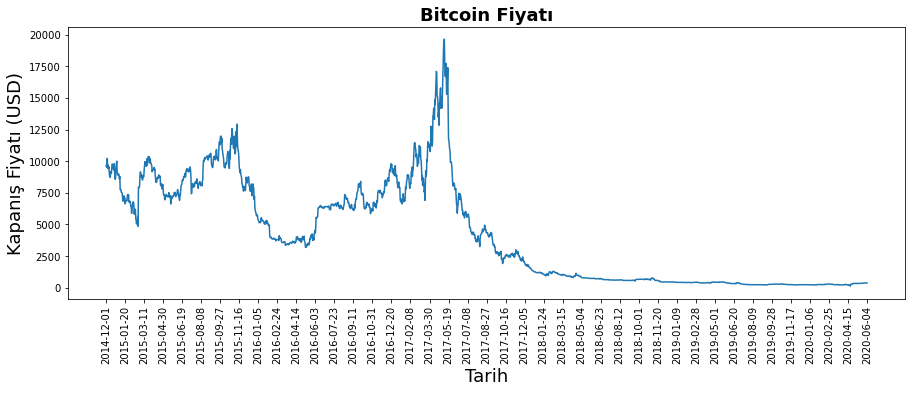

In [41]:
price=data[['Close']]
plt.figure(figsize = (15,5))#grafiğin boyutunu belirler ve figure tablonun içine işlem yapmamızı sağlar
plt.plot(price)#ilk yazılan x eksenini gösterir
plt.xticks(range(0, data.shape[0],50), data['Date'].loc[::50],rotation=90)
plt.title("Bitcoin Fiyatı",fontsize=18, fontweight='bold')#grafiğin başlığını oluşturur
plt.xlabel('Tarih',fontsize=18)#X kordinatında yazı ve büyüklüğü
plt.ylabel('Kapanış Fiyatı (USD)',fontsize=18)#Y kordinatında yazı ve büyüklüğü
plt.show()#göster metodu

# VERİYİ NORMALLEŞTİRME

In [6]:
from sklearn.preprocessing import MinMaxScaler
min_max_scaler = MinMaxScaler()


# VERİYİ ANTRENMANA ALMA

In [48]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split (x, y, test_size = 0.2)  
y_train.shape

(1400, 1)

# LİNEER REGRESYON KURULUMU

In [49]:
from sklearn.linear_model import LinearRegression
import statsmodels.api as sm



model1=sm.OLS(y_train,x_train)
fit1 = model1.fit()
print(fit1.summary())
#sm.stats.anova_lm(model1, typ=2)


                                 OLS Regression Results                                
Dep. Variable:                  Close   R-squared (uncentered):                   1.000
Model:                            OLS   Adj. R-squared (uncentered):              1.000
Method:                 Least Squares   F-statistic:                          8.159e+05
Date:                Sun, 23 May 2021   Prob (F-statistic):                        0.00
Time:                        15:46:47   Log-Likelihood:                         -8518.5
No. Observations:                1400   AIC:                                  1.705e+04
Df Residuals:                    1395   BIC:                                  1.707e+04
Df Model:                           5                                                  
Covariance Type:            nonrobust                                                  
                 coef    std err          t      P>|t|      [0.025      0.975]
-----------------------------------------

# REGRESYON İLE TAHMİN VERİSİ OLUŞUMU

In [9]:
lr = LinearRegression()
lr.fit(x_train,y_train)

tahmin = lr.predict(x_test)
print(tahmin)


[[  594.27996683]
 [ 2784.58663472]
 [10101.50070454]
 [12636.32844563]
 [ 7478.36859077]
 [  437.65091815]
 [ 4051.20577568]
 [ 6214.0274136 ]
 [  252.52339055]
 [ 2774.66383997]
 [ 1181.93389527]
 [  442.11111728]
 [  223.34518   ]
 [ 6702.91664158]
 [ 5957.82562248]
 [  667.20355909]
 [ 3979.73488138]
 [17698.65437902]
 [11539.09469225]
 [  452.47206668]
 [ 3891.34272215]
 [ 9299.99662236]
 [ 7132.48104042]
 [ 6651.56342406]
 [ 9298.84773878]
 [14699.13593816]
 [  341.25045375]
 [ 4780.79332589]
 [  455.38629732]
 [  344.34913122]
 [  380.27105249]
 [  692.85654545]
 [ 5492.95837987]
 [  237.51253317]
 [ 6038.26353113]
 [ 3950.61222947]
 [ 8369.4222472 ]
 [  238.81983548]
 [ 5333.96577826]
 [10549.44349444]
 [ 8133.33087896]
 [ 9526.99291519]
 [  214.90393033]
 [  283.91153443]
 [11276.71789443]
 [ 7701.40921936]
 [ 7125.26428517]
 [  449.7627374 ]
 [ 4188.39649388]
 [ 6650.69040162]
 [  217.66361199]
 [ 6427.01684046]
 [  376.85428907]
 [  234.4463654 ]
 [ 6708.32320858]
 [  341.25

# ORJİNAL VERİNİN NORMALLEŞTİRİLMESİ

In [10]:
orginal=pd.DataFrame(min_max_scaler.fit_transform(y_test))
#orginal=pd.DataFrame(min_max_scaler.inverse_transform(y_test))
print(orginal)

            0
0    0.020129
1    0.131688
2    0.523092
3    0.730404
4    0.381410
..        ...
396  0.002073
397  0.351417
398  0.026311
399  0.742894
400  0.022058

[401 rows x 1 columns]


# TAHMİN VERİSİNİN NORMALLEŞTİRİLMESİ

In [11]:
tahmin2=pd.DataFrame(min_max_scaler.fit_transform(tahmin))
#tahmin2=pd.DataFrame(min_max_scaler.inverse_transform(tahmin))
print(tahmin2)

            0
0    0.019688
1    0.133354
2    0.513065
3    0.644609
4    0.376937
..        ...
396  0.001663
397  0.352280
398  0.024649
399  0.730195
400  0.019416

[401 rows x 1 columns]


# VERİNİN HATA PAYI

In [52]:
rmse = np.sqrt(np.mean( tahmin2 - orginal)**2)
print(rmse) 

0    0.001362
dtype: float64


# GRAFİKLER

[Text(-50.0, 0, ''),
 Text(0.0, 0, ''),
 Text(50.0, 0, ''),
 Text(100.0, 0, ''),
 Text(150.0, 0, ''),
 Text(200.0, 0, ''),
 Text(250.0, 0, ''),
 Text(300.0, 0, ''),
 Text(350.0, 0, ''),
 Text(400.0, 0, ''),
 Text(450.0, 0, '')]

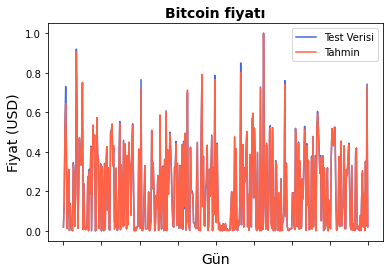

In [84]:
ax=sns.lineplot(figsize = (15,9))
#ax=sns.figure(figsize = (15,9))
ax = sns.lineplot(x=orginal.index, y=orginal[0], label="Test Verisi", color='royalblue')
#ile veri setimizde bulunan değerlerin frekansını inceleyebiliriz. Seaborn Kütüphanesi bize sns.lineplot()
#metodu ile bu özelliği sunar.
ax = sns.lineplot(x=tahmin2.index, y=tahmin2[0], label="Tahmin", color='tomato')
ax.set_title('Bitcoin fiyatı', size = 14, fontweight='bold')
ax.set_xlabel("Gün", size = 14)
ax.set_ylabel("Fiyat (USD)", size = 14)
ax.set_xticklabels('', size=10)

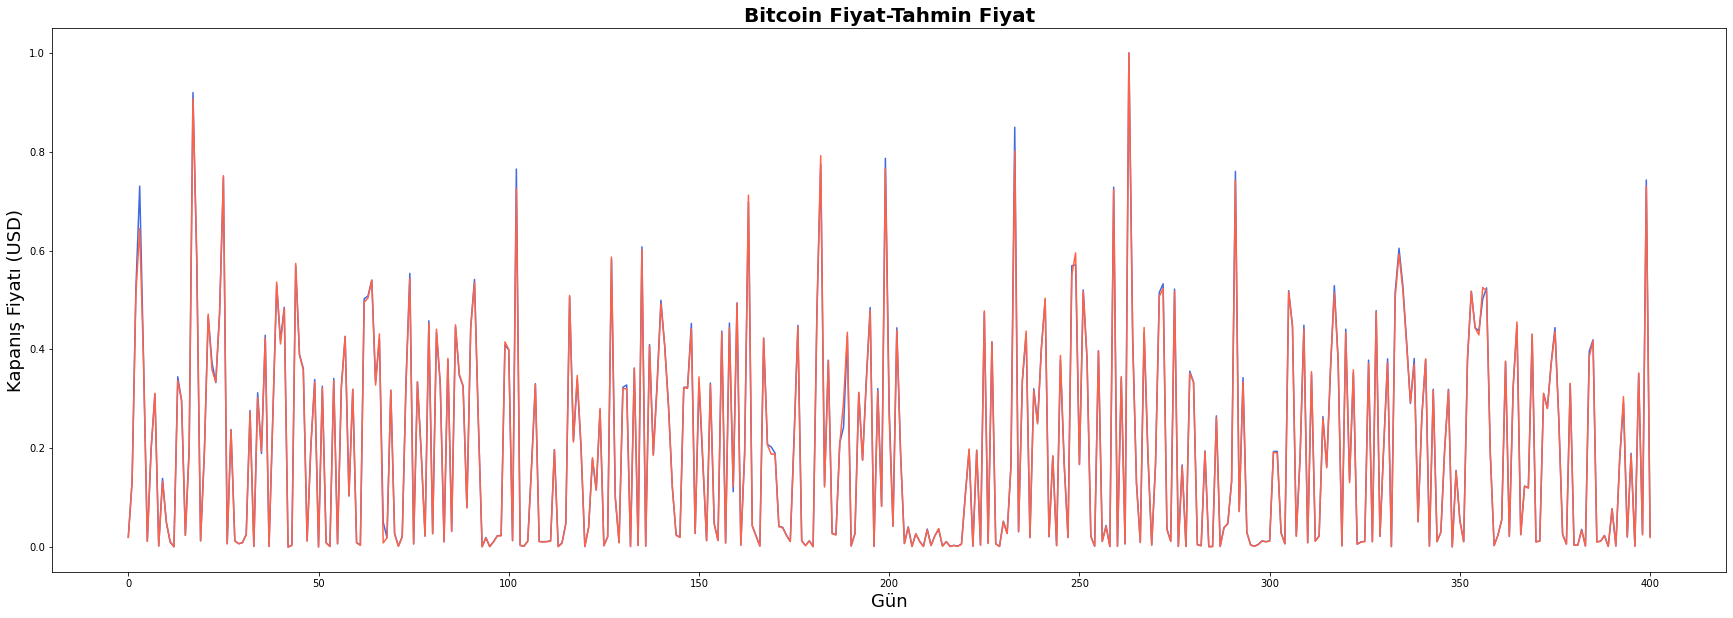

In [75]:
plt.figure(figsize=(30,10))
plt.plot(orginal.index,orginal[0],label="Test Verisi", color='royalblue')
plt.plot(tahmin2.index,tahmin2[0],label="Tahmin verisi", color='tomato')
plt.title('Bitcoin Fiyat-Tahmin Fiyat', size = 20, fontweight='bold')
plt.xlabel('Gün',fontsize=18)#X kordinatında yazı ve büyüklüğü
plt.ylabel('Kapanış Fiyatı (USD)',fontsize=18)#Y kordinatında yazı ve büyüklüğü
plt.show()


# REGRESYON UYUM TABLOSU

C:\Users\firno\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


Text(0.5, 0, 'TAHMİN VERİ')

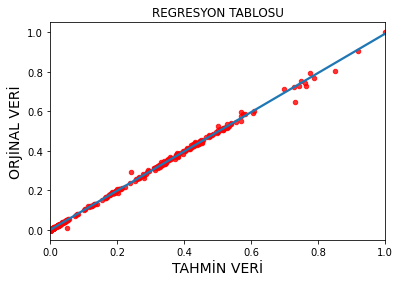

In [56]:
import seaborn as sns
import matplotlib.pyplot as plt
g= sns.regplot(orginal[0], tahmin2[0],ci=None,scatter_kws={'color':'r','s':20})
g.set_title("REGRESYON TABLOSU")
g.set_ylabel("ORJİNAL VERİ", size = 14)
g.set_xlabel("TAHMİN VERİ", size = 14)